# Entrega do Handson 8

## Prática 1: Ruído em Comunicações Analógicas



Estimação de SNR: 
   SNR de entrada: 10 dB
   SNR de entrada: 9.96 dB
   SNR de entrada: 9.9826 dB


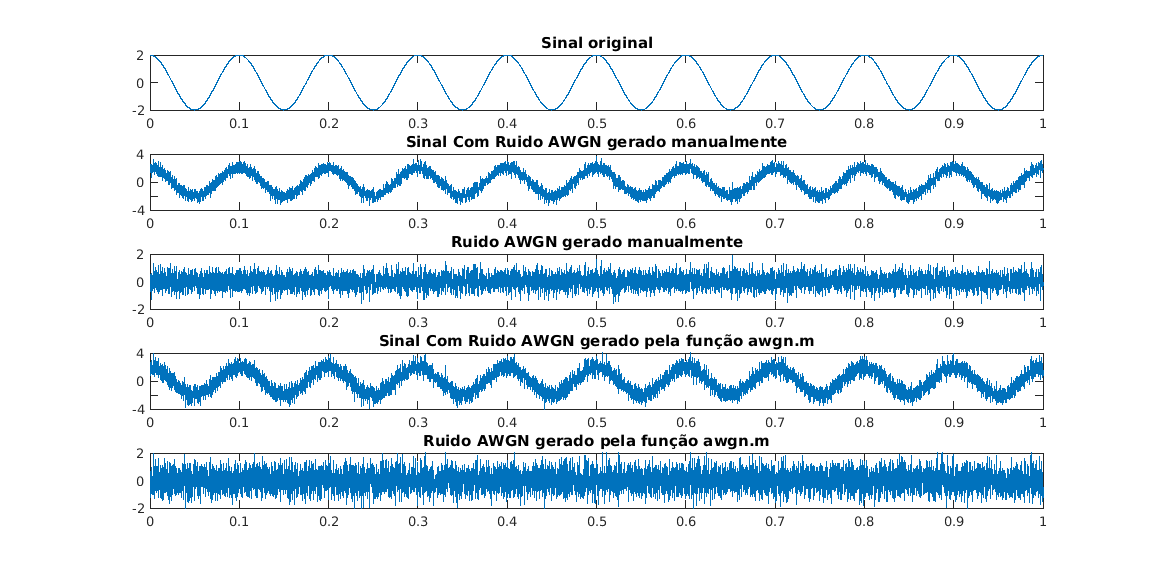

In [3]:
%% AWGN real
clc;clear all;close all;
% Parâmetros
SNR_dB = 10;                              % Determina o valor da SNR em dB
t = 0:0.0001:5;                           % Eixo do tempo
A = 2;                                    % Amplitude do sinal de entrada x(t)
x=A*cos(2*pi*10*t);                       % Sinal qualquer x(t)
%
% Geração manual das amostras de ruído 
N = length(x);                            % Calcula o comprimento de x
Ps = sum(abs(x).^2)/N;                    % Calcula a potência do sinal
SNR = 10^(SNR_dB/10);                     % Calcula a SNR linear
Pn = Ps/SNR;                              % Calcula a potência do ruído
noiseSigma = sqrt(Pn);                    % Desvio padrão do ruído AWGN (amostras reais)
n = noiseSigma* randn(1,N);               % Vetor do ruído 
y = x + n;                                % Sinal ruidoso na recepção
%
% Estimação da SNR pelas amostras do sinal recebido
pTx = sum(abs(x.^2))/N;                   % Potência do sinal x(t)
pNe = sum(abs(n.^2))/N;                   % Potência estimada do ruído
SNR1 = pTx/pNe;                           % Estimação da SNR linear
SNR1= 10*log10(SNR1);                     % SNR em dB
%
% Gerar ruído com a função awgn.m
y2 =  awgn(y,SNR_dB,'measured');
%
% Estimação da SNR pelas amostras do sinal geradas pela função awgn.m
n2 = y2-x;
potN2 = sum(abs(n2.^2))/N;                % Potência estimada do ruído
SNR2 = pTx/potN2;                         % Estimação da SNR linear
SNR2 = 10*log10(SNR1);                    % SNR em dB
%
% Mostrar informações
disp('Estimação de SNR: ')
disp(['   SNR de entrada: ' num2str(SNR_dB) ' dB']);
disp(['   SNR de entrada: ' num2str(SNR1) ' dB']);
disp(['   SNR de entrada: ' num2str(SNR2) ' dB']);
%
% Gráficos
fig=figure;
subplot(5,1,1);
plot(t,x);
title('Sinal original')
axis([0 1 -2 2]);
%
subplot(5,1,2);
plot(t,y);
title('Sinal Com Ruido AWGN gerado manualmente');
axis([0 1 -4 4]);
%
subplot(5,1,3);
plot(t,n);
title('Ruido AWGN gerado manualmente');
axis([0 1 -2 2]);
%
subplot(5,1,4);
plot(t,y2);
title('Sinal Com Ruido AWGN gerado pela função awgn.m');
axis([0 1 -4 4]);
%
subplot(5,1,5);
plot(t,n2);
title('Ruido AWGN gerado pela função awgn.m');
axis([0 1 -2 2]);
fig.PaperUnits = 'inches';
fig.PaperPosition = [0 0 12 6];

## Pratica 2: 

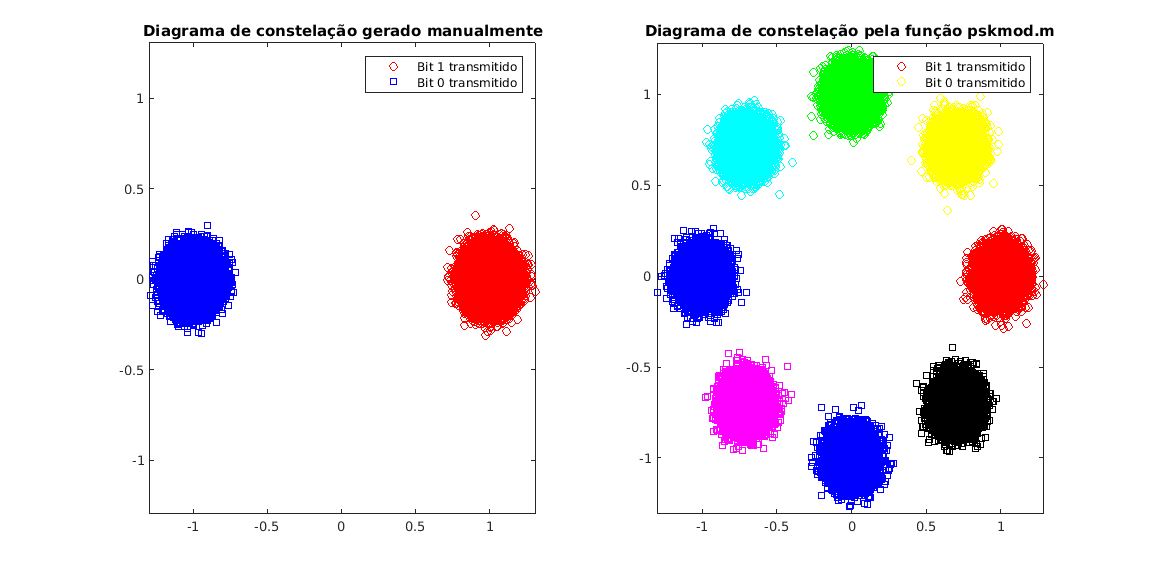

In [40]:
% Parâmetros
EbN0_dB = 20;                                          % Eb/N0 de entrada
Ns = 10^5;                                             % Número de símbolos simulados
% Sinal BPSK gerado manualmente
bits = rand(1,Ns) > 0.5;                               % Gera 0s e 1s com mesma probabilidade
simbolo = 2*bits-1;                                    % Modulação BPSK: 0 -> -1; 1 -> 1 
sigmaRuido = 10^(-EbN0_dB/(2*10));                     % Desvio padrão do ruído AWGN 
n = sigmaRuido/sqrt(2)*[randn(1,Ns) + j*randn(1,Ns)];  % Amostras do ruído AWGN
y = simbolo + n;                                       % Sinal ruidoso
% Gráficos
fig = figure;
subplot(1,2,1);
plot(y(find(real(y)>0)),'ro');
hold on;
plot(y(find(real(y)<=0)),'bs')
title('Diagrama de constelação gerado manualmente');
legend('Bit 1 transmitido','Bit 0 transmitido');
minAx = min([real(y) imag(y)]);
maxAx = max([real(y) imag(y)]);
axis([minAx maxAx minAx maxAx]);
% Sinal M-PSK gerado pela função pskmod
M = 8;                                                 % Número de símbolo da modulação
bits2 = randi([0 M-1],Ns,1);
txSig = pskmod(bits2,M);
rxSig = awgn(txSig,EbN0_dB);
% Gráficos
subplot(1,2,2);
plot((rxSig((find(angle(rxSig)>(-pi/8) & (angle(rxSig)<=(pi/8)))))),'ro');
hold on;
plot((rxSig((find(angle(rxSig)>(pi/8) & (angle(rxSig)<=((pi/4)+pi/8)))))),'yo');
hold on;
plot((rxSig((find(angle(rxSig)>((pi/4)+pi/8) & (angle(rxSig)<=((2*pi/4)+pi/8)))))),'go');
hold on;
plot((rxSig((find(angle(rxSig)>((2*pi/4)+pi/8) & (angle(rxSig)<=((3*pi/4)+pi/8)))))),'co');
hold on;
plot((rxSig((find(angle(rxSig)>((3*pi/4)+pi/8) | (angle(rxSig)<=((-3*pi/4)+pi/8)))))),'bs');
hold on;
plot((rxSig((find(angle(rxSig)<(-pi/8) & (angle(rxSig)>=((-pi/4)-pi/8)))))),'ks');
hold on;
plot((rxSig((find(angle(rxSig)<((-pi/4)-pi/8) & (angle(rxSig)>=((-2*pi/4)-pi/8)))))),'bs');
hold on;
plot((rxSig((find(angle(rxSig)<((-2*pi/4)-pi/8) & (angle(rxSig)>=((-3*pi/4)-pi/8)))))),'ms');
title('Diagrama de constelação pela função pskmod.m');
legend('Bit 1 transmitido','Bit 0 transmitido');
minAx = min([real(rxSig)' imag(rxSig)']);
maxAx = max([real(rxSig)' imag(rxSig)']);
axis([minAx maxAx minAx maxAx]);
fig.PaperUnits = 'inches';
fig.PaperPosition = [0 0 12 6];
clear all;